In [2]:
import os

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

% matplotlib inline
sns.set_color_codes()

## Comparing GDP

### A. Total GDP (constant, mkt) data 

* Construct xarray **<span style="color:white; background:maroon;">STARTED</span>**

* Compare/plot total GDP timeseries **<span style="color:white; background:maroon;">STARTED</span>**
    Ones that have constant prices in USD 
    
    - UN national accounts
    - 
    - national accounts 2005 USD
    - and WB
    

* Compare/plot major countries 
    * mortality countries
    * top 10 big / highest gdp countries
    * Question - is discrepancy from the top 10 or others? (get a factor of gdp_top_10/gdp_total

* Compare PWT values (rgpdna, rgpde, rgpdo)
* Compare with GDP (PPP)
* Compare with La Porta for Mortality countries


### Z. Convenience functions

In [4]:
def drop_non_years(_df):
    def _is_year(_y):
        try:
            float(_y)
            return True
        except ValueError:
            return False
    return _df[[x for x in _df.columns if _is_year(x)]] 

def add_iso_column(_df, _country_name_col):
    # uses iso_map (global dict)
    _df['iso'] = _df[_country_name_col].apply(lambda name: iso_map[name] if iso_map.get(name) else name)
    return _df

def set_iso_as_index(_df, _iso_col_name):
    return _df.set_index(_iso_col_name)

# # country specific
# def get_row_by_country_name(_df, country_name):
#     # Get country by name
#     return _df[_df['country_name'] == country_name]

def label_axes(_ax, years_range, gdp_type, gdp_unit, country_name):
    '''
    years_range: String
        years in string range  
    gdp_unit: String
        unit for GDP
    '''
    _ax.set_xlabel('Years {}'.format(years_range), fontsize=14)
    _ax.set_ylabel('GDP ({0} in {1})'.format(gdp_type, gdp_unit), fontsize=14)
    _ax.set_title('{0} GDP, {1}-based in {2} ({3})'.format(
        country_name, gdp_type, gdp_unit, years_range), fontsize=14)

### Y. Download data (PWT, IMF, WB) - real market

In [5]:
dir_path = os.environ['ZERG']

pwt = dir_path + 'data/pwt/pwt90.xlsx'
wb = dir_path + 'data/wb/gdp/gdp_constant/API_NY.GDP.MKTP.KD_DS2_en_csv_v2.csv'
imf = dir_path + 'data/imf/WEOOct2017all.xls'

### A. Total GDP, real mkt

First steps:
* [ ] compare total GDP (PWT/WB)
* [ ] compare select countries (a) Mortality (b) Top 10
---------------------
Nice to have:
* compare PWT values for rgpdna, rgpde, rgpdo
* compare PWT and WB values
* Note: IMF does not have mkt constant in USD (only in % change and national currency)
* compare % change across all



### Data prepping:

    0) Download/read data

In [19]:
dir_path

'/Users/mlimb/Dropbox/covariate_project/zerg/'

In [ ]:
'/Users/mlimb/Dropbox/covariate_project/zerg/data/'

In [20]:
pwt = dir_path + 'data/pwt/pwt90.xlsx'
wb = dir_path + 'data/wb/gdp/gdp_constant/API_NY.GDP.MKTP.KD_DS2_en_csv_v2.csv'
imf = dir_path + 'data/imf/weo_oct_2017_five_countries_12_28.csv'
un = dir_path + 'data/un/na/Download-GDPconstant-USD-countries.xls'

In [18]:
# pwt has all data in one file
df_pwt = pd.read_excel(pwt, sheetname='Data')

In [21]:
# WB has separate files for each (real market) - or at least this is an option
df_wb = pd.read_csv(wb, skiprows=4)

In [ ]:
df_un = pd.read_excel()

In [17]:
# Fix imf data opening
df_imf = pd.read_csv(imf)

In [ ]:
df

In [137]:
df_pwt_real_m = df_pwt_raw.copy()

#### Data prepping (PWT):

    1) rename columns (countrycode->iso and country-> country_name) to enforce consistency across munged data sources
    
    2) get subset of PWT raw data using columns of interest (real gdp, country name/iso, pop

    3) set iso column as the index

#### 1. Rename columns for name consistency across sources

In [138]:
df_pwt_renamed = df_pwt_real_m.rename(index=str, columns={'countrycode': 'iso', 'country': 'country_name'})

#### 2. Get a subset of PWT data (only columns related to gdp, plus iso and pop)

In [139]:
gdp_cols = ['iso', 'rgdpna', 'rgdpe', 'rgdpo', 'pop']

In [140]:
df_pwt_sub = df_pwt_renamed[gdp_cols]

#### 3. Set iso as index

In [141]:
df_pwt_iso = set_iso_as_index(df_pwt_sub, 'iso')
# df_pwt_iso

In [142]:
df_pwt_iso['rgdpe']

,rgdpna,rgdpe,rgdpo,pop
iso,,,,
ABW,NaN,NaN,NaN,NaN
ABW,NaN,NaN,NaN,NaN
ABW,NaN,NaN,NaN,NaN
ABW,NaN,NaN,NaN,NaN
ABW,NaN,NaN,NaN,NaN
ABW,NaN,NaN,NaN,NaN
ABW,NaN,NaN,NaN,NaN
ABW,NaN,NaN,NaN,NaN
ABW,NaN,NaN,NaN,NaN


## 1. drop all non-years

In [53]:
def drop_non_years(_df):
    def _is_year(_y):
        try:
            float(_y)
            return True
        except ValueError:
            return False
    return _df[[x for x in _df.columns if _is_year(x)]] 

In [59]:
df_pwt_m_cst.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'cor_exp', 'statcap', 'csh_c',
       'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i', 'pl_g',
       'pl_x', 'pl_m', 'pl_k'],
      dtype='object')

In [39]:
gdp_wb = pd.read_csv(wb, skiprows=4)
gdp_wb

del gdp_wb['Unnamed: 62']

In [41]:
print(gdp_wb.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')


In [42]:
gdp_wb.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.021272e+10,2.066392e+10,NaN
2,Angola,AGO,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039199e+11,1.039199e+11,NaN
3,Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.276823e+10,1.309893e+10,1.355215e+10,NaN
4,Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.675947e+09,3.535600e+09,3.346517e+09,3.185794e+09,3.129724e+09,3.127736e+09,NaN,NaN,NaN,NaN


### Get ISO translation file

In [1270]:
rhg_regions = dir_path + 'data/iso_based_on_rhg_regions.csv'

WARNING: THIS IS SLOW (heavy excel with macros, etc.) - don't re-run
#### or have a separate file just for iso

In [1271]:
# open ISO data (RHG_regions)
# this is SLOW
iso = pd.read_csv(rhg_regions)

In [1272]:
iso.columns

Index(['country_name_imf', 'ENGLISH SHORT NAME', 'ALPHA-2', 'ALPHA-3',
       'NUMERIC'],
      dtype='object')

In [1273]:
iso_map_pre = iso[['country_name_imf', 'ALPHA-3']].set_index('country_name_imf')

In [1274]:
iso_map = iso_map_pre.to_dict()['ALPHA-3']
iso_map_rev = {y:x for x,y in iso_map.items()}

In [1275]:
#iso_map_rev # map from iso to country nape
#iso_map # map from country name to ISO

In [1276]:
pwt_countries=pop_pwt['countrycode']
un_countries=pop_un['ISO3']
# wb_countries=pop_wb['Country Code']

In [1277]:
iso_map.get('moon')
iso_map.get('United States of America')

### MAP country name to country code

In [1278]:
pop_imf['country_code'] = pop_imf['country_name'].apply(lambda name: iso_map[name] if iso_map.get(name) else name)

In [1279]:
# imf data doesn't provide country code so needs manual mapping
imf_countries = pop_imf['country_code']

In [1280]:
[print(country) for country in pop_imf['country_code'].tolist() if len(country) > 3]

Congo, Republic of 
Kosovo
Syria
World
Total


[None, None, None, None, None]

In [1281]:
pwt_set = set(pwt_countries)
un_set = set(un_countries)
wb_set = set(wb_countries)
imf_set = set(imf_countries)

In [1282]:
ls = {
    'pwt': pwt_set,
    'un': un_set,
    'wb': wb_set,
    'imf': imf_set
}

for k,v in ls.items():
    print ('{} has {} countries'.format(k,len(v)))

# pwt compare

pwt has 183 countries
un has 233 countries
wb has 217 countries
imf has 194 countries


In [1283]:
countries_in_un_not_wb = ls['un'] - ls['wb']
sorted([iso_map_rev[c] for c in countries_in_un_not_wb])

['Anguilla',
 'Bonaire, Sint Eustatius and Saba',
 'Cook Islands',
 'Falkland Islands (Malvinas)',
 'French Guiana',
 'Guadeloupe',
 'Holy See',
 'Martinique',
 'Mayotte',
 'Montserrat',
 'Niue',
 'Réunion',
 'Saint Helena, Ascension and Tristan da Cunha',
 'Saint Pierre and Miquelon',
 'Taiwan Province of China',
 'Tokelau',
 'Wallis and Futuna',
 'Western Sahara']

# countries in imf but not in pwt

In [1284]:
countries_in_imf_not_pwt = ls['imf'] - ls['pwt']
     
sorted([iso_map_rev.get(c) for c in countries_in_imf_not_pwt if iso_map_rev.get(c)])

['Afghanistan',
 'Eritrea',
 'Guyana',
 'Kiribati',
 'Libya',
 'Marshall Islands',
 'Micronesia, Fed. States of',
 'Nauru',
 'Palau',
 'Papua New Guinea',
 'Puerto Rico',
 'Samoa',
 'San Marino',
 'Solomon Islands',
 'South Sudan, Republic of',
 'Timor-Leste',
 'Tonga',
 'Tuvalu',
 'Vanuatu']

## Convenience functions

### Function to retrieve missing # years per country for a given list of countries
```
Given a list of countries

Retrieve # of missing years for each country

Optional: *specify a dataset
Optional: replace Country Name with Country code to be more reusable
```

In [1285]:
def get_missing_years(_list_of_countries):
    '''
    Parmeters
    ----
    [Python List] _list_of_countries
        list of countries (each country is a Country name as a String)
        
    Returns
    ----
    [Python List]
        a list of tuple pairs containing (country_name, #_missing_years)
    where country_name (String) and # missing_years (int)
    sorted by decreasing # of missing years
    '''
    missing_years = []
    
    return []

### Mungdata data

1) rename indexes to be consistent across data set

2) set iso column as the index

#### Rename cols

In [1286]:
# rename column names
del pop_wb['Unnamed: 0']

# IMF
pop_imf = add_iso_column(pop_imf, 'country_name')

# PWT
pop_pwt.rename(index=str, columns={'countrycode': 'iso', 'country': 'country_name'}, inplace=True)

# WB
pop_wb.rename(index=str, columns={"Country Code": "iso", "Country Name": "country_name"}, inplace=True)

# UN
del pop_un['Unnamed: 0']
pop_un.rename(index=str, columns={'ISO3': 'iso', 'Location': 'country_name'}, inplace=True)

#### Set ISO as Index

In [1287]:
df_imf = set_iso_as_index(pop_imf, 'iso')
df_pwt = set_iso_as_index(pop_pwt, 'iso')
df_wb = set_iso_as_index(pop_wb, 'iso')
df_un = set_iso_as_index(pop_un, 'iso')

## Get max population data from each data set

In [1288]:
# also in convience_functions
def get_max_countries(_df, _n, _yr):
    '''
    Returns n largest country data values from the given year
    
    _df: pd.DataFrame
        data frame containing population of gdp data for all countries

    _n: int
        # of largest values to retrieve
        
    _yr: int
        given year
    '''
    return _df.nlargest(_n, _yr)

### Function to make df of single country based on four data sets..

#### ok it may make sense to use xarray, and include all nan values for missing years
#### so this step isn't done manually for each country and there is no need to subset data each time (based on years of availability)

In [1289]:
def make_df_single_country(_iso):
    '''
    Abstracting out what was done for Brazil. Need to test to see if this works
    
    _iso: String
       iso country code in three letters ex. CHN for China and BRA for Brazil
        
    '''
    assert cpwt.shape == cwb.shape == cimf.shape == cun.shape
    
    #pwt
    _pwt = df_pwt.loc[_iso][31:] * 10**6
    
    #wb
    _wb = df_wb.loc[_iso][21:56]
    
    # un
    _un = df_un.loc[_iso][31:66] * 10**3
    
    # imf
    _imf = df_imf.loc[_iso][1:36] * 10**6

    return pd.DataFrame({'pwt': _pwt, 
                   'wb': _wb, 
                   'un': _un,
                   'imf': _imf})

### Get Brazil/BRA data

In [1290]:
pwt_bra = df_pwt.loc['BRA'][31:] * 10**6 # 1980 to 2014, 35 years
assert pwt_bra.shape == wb_bra.shape == imf_bra.shape == un_bra.shape

In [1291]:
wb_bra = df_wb.loc['BRA'][21:56] # seems like absolute value to me
un_bra = df_un.loc['BRA'][31:66] * 10 **3

In [1292]:
un_bra.get_values()[1]

124030908.0

In [1293]:
imf_bra = df_imf.loc['BRA'][1:36] * 10**6


In [1294]:
# # print(cwb.idxmax(), cwb.idxmin())
# print(cimf.idxmax(), cimf.idxmin())
# print(cpwt.idxmax(), cpwt.idxmin())
# print(cun.idxmax(), cun.idxmin())

In [1295]:
type(un_bra.index) == pd.core.indexes.numeric.Float64Index

False

In [1296]:
for _df in [pwt_bra, wb_bra, un_bra, imf_bra]:
    if type(_df.index) != pd.core.indexes.numeric.Float64Index:
        _df.index = _df.index.map(float)
        
for _df in [pwt_bra, wb_bra, un_bra, imf_bra]:
    print (type(_df.index))

<class 'pandas.core.indexes.numeric.Float64Index'>
<class 'pandas.core.indexes.numeric.Float64Index'>
<class 'pandas.core.indexes.numeric.Float64Index'>
<class 'pandas.core.indexes.numeric.Float64Index'>


In [1297]:
(un_bra-wb_bra).get_values()

array([0.0, 0.0, 0.0, 0.0, 1.4901161193847656e-08, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 2.9802322387695312e-08, 0.0, 2.9802322387695312e-08, 0.0,
       -2.9802322387695312e-08, 0.0, 0.0, 2.9802322387695312e-08, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

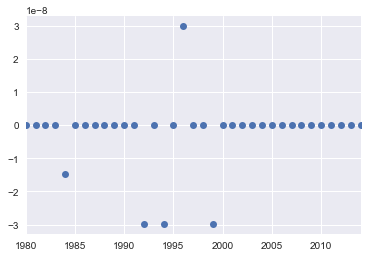

In [1298]:
# Plot difference 
wb_un_diff = wb_bra-un_bra
wb_un_diff.plot(style='o')

In [1299]:
df1 = pd.DataFrame({'pwt': pwt_bra, 
                   'wb': wb_bra, 
                   'un': un_bra,
                   'imf': imf_bra})

#pd.concat([cpwt, cwb, cun, cimf], axis=1)

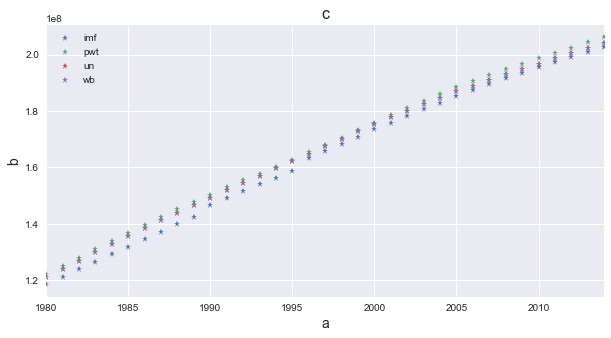

In [1338]:
# plt.close()
# plt.figure(figsize=(18,15))


# pwt9.set_index(['countrycode', 'year']).unstack('year')['rgdpe_pc'].loc[['IND', 'IDN', 'BRA', 'CHN']].T.plot(style='*')
p1 = df1.plot(style='*', figsize=(10,5))
label_axes(plt, 'a', 'b', 'c')

In [1301]:
df1.isnull().sum()
# no nan values!

imf    0
pwt    0
un     0
wb     0
dtype: int64

## Compare total population

### Get only years 1980-2014

In [1302]:
cols_of_interest = ['country_name']
years = [str(y) for y in range(1980, 2015)]
cols_of_interest.extend(years)

In [1303]:
ds = [df_pwt, df_wb, df_un, df_imf]

In [1304]:
## Convert imf years from int to str (to be consistent with other datasets)
df_imf.columns = map(str, df_imf.columns)
df_imf.columns

Index(['country_name', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'country_code'],
      dtype='object')

In [1305]:
for dd in ds:
    print(dd[cols_of_interest].shape)

(183, 36)
(217, 36)
(233, 36)
(194, 36)


In [1306]:
df_pwt

,country_name,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
iso,,,,,,,,,,,,,,,,,,,,,
ALB,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.082172,3.050741,3.010849,2.968026,2.929886,2.901883,2.886010,2.880667,2.883281,2.889676
DZA,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.267887,33.749328,34.261971,34.811059,35.401790,36.036159,36.717132,37.439427,38.186135,38.934334
AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.912942,18.541467,19.183907,19.842251,20.520103,21.219954,21.942296,22.685632,23.448202,24.227524
AIA,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012637,0.012903,0.013145,0.013365,0.013571,0.013768,0.013956,0.014133,0.014300,0.014460
ATG,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082565,0.083467,0.084397,0.085350,0.086300,0.087233,0.088152,0.089069,0.089985,0.090900
ARG,Argentina,17.158029,17.525200,17.884976,18.238994,18.588894,18.936311,19.280156,19.619336,19.955487,...,39.145491,39.558750,39.969903,40.381860,40.798641,41.222875,41.655616,42.095224,42.538304,42.980026
ARM,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.014917,3.002161,2.988117,2.975029,2.966108,2.963496,2.967984,2.978339,2.992192,3.006154
ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.100031,0.100830,0.101218,0.101342,0.101416,0.101597,0.101936,0.102393,0.102921,0.103441
AUS,Australia,8.427065,8.675029,8.859130,9.029064,9.239138,9.456325,9.684162,9.900220,10.106834,...,20.274282,20.606228,20.975949,21.370348,21.770690,22.162863,22.542371,22.911375,23.270465,23.622353


In [1307]:
df_pwt.iloc[:182,:]

,country_name,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
iso,,,,,,,,,,,,,,,,,,,,,
ALB,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.082172,3.050741,3.010849,2.968026,2.929886,2.901883,2.886010,2.880667,2.883281,2.889676
DZA,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.267887,33.749328,34.261971,34.811059,35.401790,36.036159,36.717132,37.439427,38.186135,38.934334
AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.912942,18.541467,19.183907,19.842251,20.520103,21.219954,21.942296,22.685632,23.448202,24.227524
AIA,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012637,0.012903,0.013145,0.013365,0.013571,0.013768,0.013956,0.014133,0.014300,0.014460
ATG,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082565,0.083467,0.084397,0.085350,0.086300,0.087233,0.088152,0.089069,0.089985,0.090900
ARG,Argentina,17.158029,17.525200,17.884976,18.238994,18.588894,18.936311,19.280156,19.619336,19.955487,...,39.145491,39.558750,39.969903,40.381860,40.798641,41.222875,41.655616,42.095224,42.538304,42.980026
ARM,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.014917,3.002161,2.988117,2.975029,2.966108,2.963496,2.967984,2.978339,2.992192,3.006154
ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.100031,0.100830,0.101218,0.101342,0.101416,0.101597,0.101936,0.102393,0.102921,0.103441
AUS,Australia,8.427065,8.675029,8.859130,9.029064,9.239138,9.456325,9.684162,9.900220,10.106834,...,20.274282,20.606228,20.975949,21.370348,21.770690,22.162863,22.542371,22.911375,23.270465,23.622353


In [1308]:
total_pwt_pop_row = df_pwt.iloc[:182, 31:].sum(axis=0, numeric_only=True)

In [1309]:
# Calculate total values for PWT, UN and Wb. IMF has them
# Check these match with sum calculated via Excel

# this method didn't work for me
#df_pwt.append({'Total3': total_pwt_pop_row}, ignore_index=True)

# df_imf.append(df_imf.sum(skipna=True, numeric_only=True), ignore_index=True)
# # source https://stackoverflow.com/questions/21752399/pandas-dataframe-total-row

In [1310]:
df_pwt.loc['Total_pd'] = df_pwt.iloc[:182, 1:].sum()
#df_pwt

# total calculated via pd vs excel is same..

In [1311]:
# country specific
def get_row_by_country_name(_df, country_name):
    # Get country by name
    return _df[_df['country_name'] == country_name]

In [1312]:
# get only columns of interest
cols_for_total = [str(y) for y in range(1980, 2015)]

### a) PWT total

In [1313]:
pwt_total = get_row_by_country_name(df_pwt, 'Total')[cols_for_total].reset_index()

#pwt_sub.insert(0, 'source', 'pwt')
del pwt_total['iso']
pwt_total

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,4067.792483,4143.257371,4220.377104,4299.388723,4380.569063,4464.010935,4549.851998,4637.781818,4726.781921,4826.84662,...,6423.692232,6502.565145,6582.438253,6663.083371,6744.362187,6826.078342,6907.928139,6990.183842,7072.456671,7154.701081


### b) WB Total

In [1314]:
# WB Total
df_wb
df_wb.loc['Total'] = df_wb.iloc[:, 1:].sum()
wb_total = df_wb[cols_for_total].loc['Total']
wb_total.to_dict()

{'1980': 4412687234.0,
 '1981': 4490389883.0,
 '1982': 4571076858.0,
 '1983': 4652462765.0,
 '1984': 4733621360.0,
 '1985': 4816428709.0,
 '1986': 4901929843.0,
 '1987': 4989677185.0,
 '1988': 5078341787.0,
 '1989': 5167144780.0,
 '1990': 5264644548.0,
 '1991': 5351624249.0,
 '1992': 5435434249.0,
 '1993': 5520176501.0,
 '1994': 5603814414.0,
 '1995': 5688489338.0,
 '1996': 5771127347.0,
 '1997': 5853764158.0,
 '1998': 5935401460.0,
 '1999': 6016057278.0,
 '2000': 6095890763.0,
 '2001': 6175296997.0,
 '2002': 6254361245.8828726,
 '2003': 6333696910.8989267,
 '2004': 6413700161.9913721,
 '2005': 6494291045.2439661,
 '2006': 6575597802.4849863,
 '2007': 6657505602.9909286,
 '2008': 6740747977.2955341,
 '2009': 6824136049.1102009,
 '2010': 6907518699.3622274,
 '2011': 6989663635.3578157,
 '2012': 7069577688.0772333,
 '2013': 7154865116.6100826,
 '2014': 7240848130.7391624}

### c) IMF Total

In [1315]:
imf_total = get_row_by_country_name(df_imf, 'Total').reset_index()[cols_for_total]
imf_total

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,3996.821,4069.095,4144.355,4218.711,4292.474,4368.624,4447.162,4527.179,4605.502,4835.87,...,6406.832,6486.862,6569.934,6649.709,6729.132,6808.318,6868.647,6953.668,7034.943,7116.69


### d) UN total

In [1316]:
un_total =df_un[cols_of_interest].iloc[:, 1:].sum()
un_total.to_dict() # pd.Series

{'1980': 4458411.5340000037,
 '1981': 4537845.7769999998,
 '1982': 4618776.1680000005,
 '1983': 4701530.8429999994,
 '1984': 4786483.8619999988,
 '1985': 4873781.7960000029,
 '1986': 4963633.2279999992,
 '1987': 5055636.1320000011,
 '1988': 5148556.956000003,
 '1989': 5240735.1169999996,
 '1990': 5330943.46,
 '1991': 5418758.8029999975,
 '1992': 5504401.1489999946,
 '1993': 5588094.8370000059,
 '1994': 5670319.7029999979,
 '1995': 5751474.4160000002,
 '1996': 5831565.0199999996,
 '1997': 5910566.294999999,
 '1998': 5988846.1029999964,
 '1999': 6066867.3910000017,
 '2000': 6145006.9890000001,
 '2001': 6223412.157999998,
 '2002': 6302149.6390000032,
 '2003': 6381408.9869999979,
 '2004': 6461370.865000003,
 '2005': 6542159.3830000032,
 '2006': 6623847.9130000016,
 '2007': 6706418.5930000022,
 '2008': 6789771.2530000033,
 '2009': 6873741.0540000014,
 '2010': 6958169.1589999981,
 '2011': 7043008.5860000011,
 '2012': 7128176.9350000015,
 '2013': 7213426.4520000014,
 '2014': 7298453.032999993

In [1317]:
imf_total = imf_total.loc[0] # convert to series

In [1318]:
df_pop_total = pd.DataFrame({
    'un': un_total* 10**3,
    'wb': wb_total,
    'imf': imf_total*10**6,
    'pwt': pwt_total.loc[0]*10**6
})

df_pop_total.to_csv('munged_data/total_population_all_sources.csv')

Text(0.5,1,'Total Population (1980-2014) from different sources')

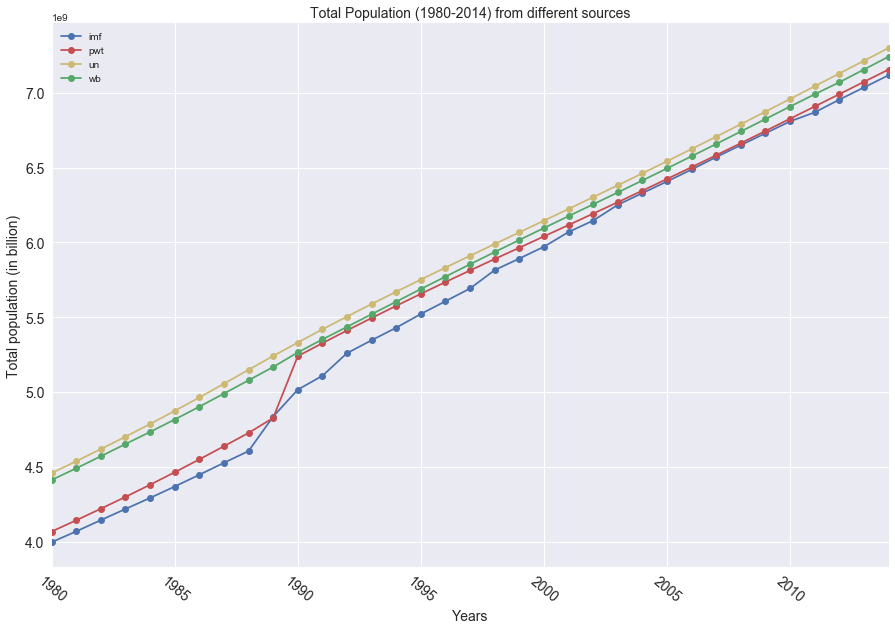

In [1416]:
plt.close()

a = df_pop_total.plot(style=['bo-','ro-', 'yo-', 'go-'], figsize=(15,10), fontsize=14, grid=True, rot=320, colormap='tab10')
# pwt9.set_index(['countrycode', 'year']).unstack('year')['rgdpe_pc'].loc[['IND', 'IDN', 'BRA', 'CHN']].T.plot(style='*')

type(a)
a.set_xlabel('Years', fontsize=14)
a.set_ylabel('Total population (in billion)', fontsize=14)
a.set_title('Total Population (1980-2014) from different sources', fontsize=14)
#a.grid(False)

# arr = np.arange(100).reshape((10,10))

# plt.close('all')
# fig = plt.figure(figsize=(5,4))

# ax = plt.subplot(111)
# im = ax.imshow(arr, interpolation="none")

# plt.tight_layout()


Text(0.5,1,'Total Population (1980-2014) from different sources')

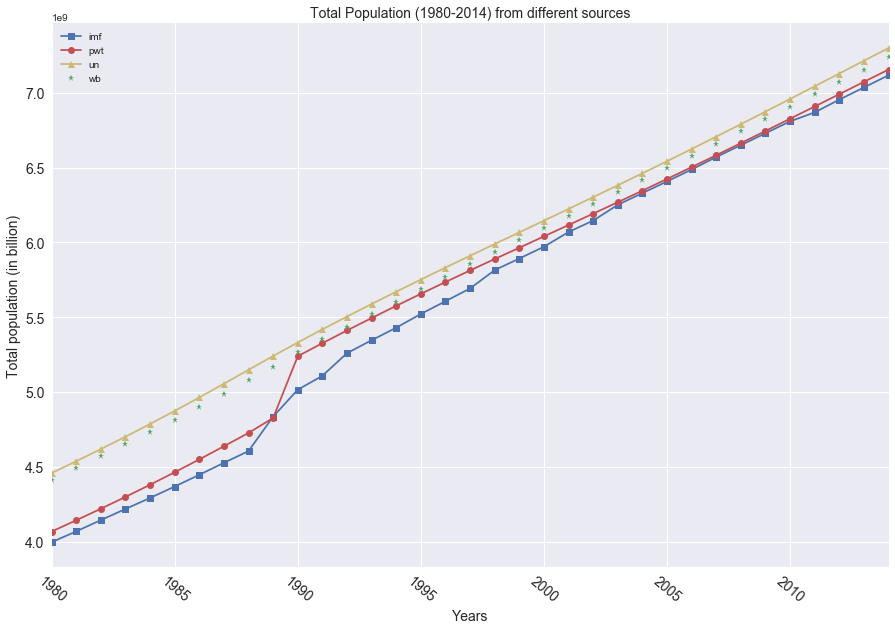

In [1413]:
plt.close()

a = df_pop_total.plot(style=['bs-','ro-', 'y^-', 'g*'], figsize=(15,10), fontsize=14, grid=True, rot=320, colormap='tab10')
# pwt9.set_index(['countrycode', 'year']).unstack('year')['rgdpe_pc'].loc[['IND', 'IDN', 'BRA', 'CHN']].T.plot(style='*')

type(a)
a.set_xlabel('Years', fontsize=14)
a.set_ylabel('Total population (in billion)', fontsize=14)
a.set_title('Total Population (1980-2014) from different sources', fontsize=14)
#a.grid(False)

# arr = np.arange(100).reshape((10,10))

# plt.close('all')
# fig = plt.figure(figsize=(5,4))

# ax = plt.subplot(111)
# im = ax.imshow(arr, interpolation="none")

# plt.tight_layout()


In [ ]:
a

In [1387]:
df_total_pop

,imf,pwt,un,wb


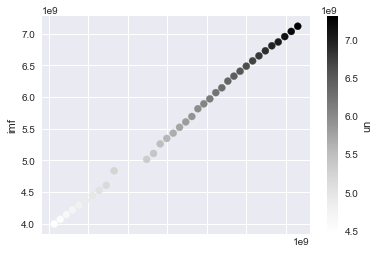

In [1390]:
df_pop_total.plot(kind='scatter', x='pwt', y='imf', c='un', s=50);


#### Why does WB have higher population than others? (verify summing process was correct)

### Compare growth rate values of total population

### Calculate percent change!


In [1320]:
# calculate percent change!
    
print(df_pop_total['wb'].pct_change().tolist())

[nan, 0.0176089183029553, 0.017968812753981434, 0.01780453698947637, 0.017444222361229444, 0.017493445863612456, 0.017751977484942838, 0.017900570756903766, 0.01776960687287432, 0.017486612111718536, 0.01886917672161692, 0.01652147646568891, 0.01566066601474514, 0.015590705014156159, 0.015151311372896936, 0.015110229879929049, 0.014527232818731806, 0.014319006674312407, 0.013946120785961469, 0.01358894062070748, 0.013270067306696331, 0.01302619044323583, 0.012803311147833396, 0.012684854919162047, 0.0126313671490621, 0.012565427322310585, 0.012519727969470207, 0.012456327617085705, 0.01250353800186188, 0.01237074462589871, 0.012218784861843357, 0.011892104758713495, 0.011433175741843327, 0.012064006125385163, 0.012017419298299581]


In [1321]:
test = df_pop_total['wb'].head()
(test[2]-test[1])*1.0 / test[1]
pct_del = lambda _s, idx: (_s[idx]-_s[idx-1]*1.0)/_s[idx-1]
print(pct_del(test,3))
print(pct_del(test,2))
print(pct_del(test,1))

0.0178045369895
0.017968812754
0.017608918303


### Compare select countries

Brazil [x] above
China
UK
USA
Indonesia
India
Japan
Tanzania
...


### Do single year comparison
